In [1]:
import fastai.tabular.all as ft
import pandas as pd

import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

In [2]:
pd.read_csv('rossmann-store-sales/train.csv')

/home/emacc/anaconda3/envs/neuralnetworks/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [3]:
df = pd.read_csv('rossmann-store-sales/train.csv', low_memory = False, parse_dates = ['Date'])

In [4]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [5]:
df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 69.8+ MB


In [7]:
df = df.sort_values(['Date']).copy()

In [8]:
df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017208,1115,2,2013-01-01,0,0,0,0,a,1
1016473,379,2,2013-01-01,0,0,0,0,a,1
1016472,378,2,2013-01-01,0,0,0,0,a,1
1016471,377,2,2013-01-01,0,0,0,0,a,1
1016470,376,2,2013-01-01,0,0,0,0,a,1
...,...,...,...,...,...,...,...,...,...
745,746,5,2015-07-31,9082,638,1,1,0,1
746,747,5,2015-07-31,10708,826,1,1,0,1
747,748,5,2015-07-31,7481,578,1,1,0,1
741,742,5,2015-07-31,10460,1016,1,1,0,1


# RMSPE

evaluar con RMSPE, definido por:

$$
RMSPE(y', y) = \sqrt{\frac{1}{n} \sum \left(\frac{y - y'}{y}\right)^2}
$$
donde $y'$ es la predicion y $y$ es el real. Ademas, donde $y = 0$ se ignora. Es mejor usar MSE o L1

In [9]:
def rmspe(yp, y):
    u = (y- yp)/y
    return torch.sqrt((u*u).mean())

In [10]:
df = df[df["Sales"] > 0].copy()

df['Sales'] = df['Sales'].astype('float64')

In [11]:
df['Sales'].max()

41551.0

In [12]:
df['Sales'] /= 1000. #al multilicar o dividir por una constante, no cambia para nada

In [13]:
df['Sales'].max()

41.551

Hay que dividir en variables categoricas, continuas y $y$

In [14]:
categoricas = ['Store', 'DayOfWeek', 'Open', 'Promo', 'SchoolHoliday', 'StateHoliday'] #customers no viene en el test asi que no lo necesitmamos
continuas = []
y_name = ['Sales'] 

In [15]:
len(df)

844338

In [16]:
X = list(range(len(df)))
# X = ft.range_of(df) # mas rapido

In [17]:
valid_cut = len(df) - 20000

In [18]:
src = ft.TabularPandas(df, procs = [ft.Categorify, ft.FillMissing],
                       cat_names = categoricas, cont_names = continuas, y_names = y_name,
                        splits = (X[:valid_cut], X[valid_cut:]))

In [19]:
dls = src.dataloaders(bs = 2048)

In [20]:
batch = dls.one_batch()

In [21]:
cat, cont, y = batch # cat categoricas, cont continuas, y lo que quieres predecir

In [22]:
cat.shape

torch.Size([2048, 6])

In [23]:
cont.shape

torch.Size([2048, 0])

In [24]:
cat

tensor([[318,   3,   1,   2,   1,   1],
        [ 57,   5,   1,   2,   2,   1],
        [256,   4,   1,   1,   1,   1],
        ...,
        [359,   5,   1,   1,   1,   1],
        [ 23,   3,   1,   1,   2,   1],
        [426,   3,   1,   1,   1,   1]], device='cuda:0')

In [25]:
y

tensor([[14.2860],
        [10.8920],
        [ 6.6170],
        ...,
        [ 6.3490],
        [ 3.6070],
        [ 4.4230]], device='cuda:0')

In [26]:
learn = ft.tabular_learner(dls, opt_func = ft.ranger, metrics=rmspe)

In [27]:
learn.summary()

TabularModel (Input shape: 2048 x torch.Size([2048, 0]))
Layer (type)         Output Shape         Param #    Trainable 
                     2048 x 81           
Embedding                                 90396      True      
____________________________________________________________________________
                     2048 x 5            
Embedding                                 40         True      
____________________________________________________________________________
                     2048 x 2            
Embedding                                 4          True      
____________________________________________________________________________
                     2048 x 3            
Embedding                                 9          True      
Embedding                                 9          True      
____________________________________________________________________________
                     2048 x 4            
Embedding                                

In [28]:
learn.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(1116, 81)
    (1): Embedding(8, 5)
    (2): Embedding(2, 2)
    (3): Embedding(3, 3)
    (4): Embedding(3, 3)
    (5): Embedding(5, 4)
  )
  (emb_drop): Dropout(p=0.0, inplace=False)
  (bn_cont): BatchNorm1d(0, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): LinBnDrop(
      (0): BatchNorm1d(98, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (1): Linear(in_features=98, out_features=200, bias=False)
      (2): ReLU(inplace=True)
    )
    (1): LinBnDrop(
      (0): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (1): Linear(in_features=200, out_features=100, bias=False)
      (2): ReLU(inplace=True)
    )
    (2): LinBnDrop(
      (0): Linear(in_features=100, out_features=1, bias=True)
    )
  )
)

SuggestedLRs(lr_min=0.06309573650360108, lr_steep=0.02290867641568184)

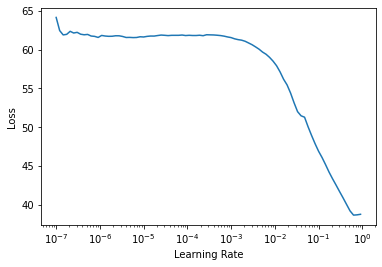

In [29]:
learn.lr_find()

In [30]:
learn.fit_one_cycle(20, 1e-3, div = 2, pct_start = 0.5)

epoch,train_loss,valid_loss,rmspe,time
0,2.525467,1.507583,0.195364,00:07
1,1.665873,1.245077,0.157616,00:06
2,1.585284,1.206991,0.151010,00:06
3,1.587420,1.198015,0.152167,00:07
4,1.572240,1.189628,0.151396,00:07
5,1.531623,1.198019,0.151401,00:07
6,1.538648,1.175363,0.149520,00:07
7,1.548698,1.193313,0.151708,00:06
8,1.532386,1.186461,0.150408,00:06
9,1.503713,1.168443,0.148850,00:07


Para mejorar, hay que cambiar la funcion de perdida, cambiar el modelo, o agregar mas datos

In [31]:
def mspe(yp, y):
    u = (y-yp)/y
    return (u*u).mean()

In [32]:
learn = ft.tabular_learner(dls, loss_func = mspe ,opt_func = ft.ranger, metrics=rmspe)

In [33]:
learn.fit_one_cycle(20, 1e-3, div =2 ,pct_start = 0.5)

epoch,train_loss,valid_loss,rmspe,time
0,0.077342,0.033259,0.179623,00:06
1,0.050438,0.028777,0.168049,00:06
2,0.035373,0.024980,0.157038,00:06
3,0.033727,0.024545,0.155621,00:06
4,0.043807,0.025592,0.158923,00:06
5,0.034572,0.024066,0.154098,00:06
6,0.031135,0.024244,0.154539,00:06
7,0.033758,0.023375,0.151901,00:06
8,0.050206,0.023957,0.153639,00:06
9,0.030160,0.022694,0.149492,00:06


## Modelo

In [35]:
learn = ft.tabular_learner(dls,
                          loss_func =mspe,
                          emb_szs = {'Store':16},
                          layers = [256,128,128],
                          config = ft.tabular_config(act_cls = nn.LeakyReLU(inplace=True)),
                          opt_func = ft.ranger,
                          metrics =rmspe)

In [36]:
learn.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(1116, 16)
    (1): Embedding(8, 5)
    (2): Embedding(2, 2)
    (3): Embedding(3, 3)
    (4): Embedding(3, 3)
    (5): Embedding(5, 4)
  )
  (emb_drop): Dropout(p=0.0, inplace=False)
  (bn_cont): BatchNorm1d(0, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): LinBnDrop(
      (0): BatchNorm1d(33, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (1): Linear(in_features=33, out_features=256, bias=False)
      (2): LeakyReLU(negative_slope=0.01, inplace=True)
    )
    (1): LinBnDrop(
      (0): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (1): Linear(in_features=256, out_features=128, bias=False)
      (2): LeakyReLU(negative_slope=0.01, inplace=True)
    )
    (2): LinBnDrop(
      (0): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (1): Linear(in_features=128, out_features=128, bia

In [37]:
learn.fit_one_cycle(20, 1e-3, div =2 ,pct_start = 0.5)

epoch,train_loss,valid_loss,rmspe,time
0,0.130979,0.057839,0.227980,00:07
1,0.037682,0.026428,0.161374,00:08
2,0.041927,0.024575,0.155827,00:07
3,0.032866,0.024213,0.154457,00:08
4,0.035260,0.025595,0.158480,00:08
5,0.030044,0.023392,0.151440,00:08
6,0.028510,0.023002,0.150263,00:07
7,0.029123,0.023447,0.151399,00:07
8,0.029908,0.023427,0.151835,00:07
9,0.029542,0.022706,0.149409,00:07


# Agregar mas datos


In [38]:
df = pd.read_csv('rossmann-store-sales/train.csv', low_memory = False, parse_dates = ['Date'])

In [39]:
df = df.sort_values(['Date']).copy()
ft.add_datepart(df,'Date')

,Store,DayOfWeek,Week,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,...,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed
1017208,1115,2,1,0,0,0,0,a,1,2013,...,1,1,1,False,True,False,True,False,True,1356998400
1016473,379,2,1,0,0,0,0,a,1,2013,...,1,1,1,False,True,False,True,False,True,1356998400
1016472,378,2,1,0,0,0,0,a,1,2013,...,1,1,1,False,True,False,True,False,True,1356998400
1016471,377,2,1,0,0,0,0,a,1,2013,...,1,1,1,False,True,False,True,False,True,1356998400
1016470,376,2,1,0,0,0,0,a,1,2013,...,1,1,1,False,True,False,True,False,True,1356998400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,746,5,31,9082,638,1,1,0,1,2015,...,31,4,212,True,False,False,False,False,False,1438300800
746,747,5,31,10708,826,1,1,0,1,2015,...,31,4,212,True,False,False,False,False,False,1438300800
747,748,5,31,7481,578,1,1,0,1,2015,...,31,4,212,True,False,False,False,False,False,1438300800
741,742,5,31,10460,1016,1,1,0,1,2015,...,31,4,212,True,False,False,False,False,False,1438300800


In [40]:
df.drop('DayOfWeek', axis = 1, inplace=True)

In [43]:
df = df[df['Sales'] > 0].copy()

df['Sales'] = df['Sales'].astype('float64')/1000

In [44]:
df

,Store,Week,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed
1016447,353,1,3.139,820,1,0,a,1,2013,1,1,1,1,False,True,False,True,False,True,1356998400
1016429,335,1,2.401,482,1,0,a,1,2013,1,1,1,1,False,True,False,True,False,True,1356998400
1016606,512,1,2.646,625,1,0,a,1,2013,1,1,1,1,False,True,False,True,False,True,1356998400
1016588,494,1,3.113,527,1,0,a,1,2013,1,1,1,1,False,True,False,True,False,True,1356998400
1016624,530,1,2.907,532,1,0,a,1,2013,1,1,1,1,False,True,False,True,False,True,1356998400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,746,31,9.082,638,1,1,0,1,2015,7,31,4,212,True,False,False,False,False,False,1438300800
746,747,31,10.708,826,1,1,0,1,2015,7,31,4,212,True,False,False,False,False,False,1438300800
747,748,31,7.481,578,1,1,0,1,2015,7,31,4,212,True,False,False,False,False,False,1438300800
741,742,31,10.460,1016,1,1,0,1,2015,7,31,4,212,True,False,False,False,False,False,1438300800


In [45]:
stores = pd.read_csv('rossmann-store-sales/store.csv')

In [47]:
stores

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [48]:
df_stores = df.join(stores.set_index('Store'), on='Store')

In [49]:
df_stores

,Store,Week,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,Elapsed,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1016447,353,1,3.139,820,1,0,a,1,2013,1,...,1356998400,b,b,900.0,NaN,NaN,1,14.0,2013.0,"Feb,May,Aug,Nov"
1016429,335,1,2.401,482,1,0,a,1,2013,1,...,1356998400,b,a,90.0,NaN,NaN,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1016606,512,1,2.646,625,1,0,a,1,2013,1,...,1356998400,b,b,590.0,NaN,NaN,1,5.0,2013.0,"Mar,Jun,Sept,Dec"
1016588,494,1,3.113,527,1,0,a,1,2013,1,...,1356998400,b,a,1260.0,6.0,2011.0,0,NaN,NaN,NaN
1016624,530,1,2.907,532,1,0,a,1,2013,1,...,1356998400,a,c,18160.0,NaN,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,746,31,9.082,638,1,1,0,1,2015,7,...,1438300800,d,c,4330.0,2.0,2011.0,1,35.0,2011.0,"Mar,Jun,Sept,Dec"
746,747,31,10.708,826,1,1,0,1,2015,7,...,1438300800,c,c,45740.0,8.0,2008.0,0,NaN,NaN,NaN
747,748,31,7.481,578,1,1,0,1,2015,7,...,1438300800,d,a,2380.0,3.0,2010.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
741,742,31,10.460,1016,1,1,0,1,2015,7,...,1438300800,d,c,4380.0,NaN,NaN,0,NaN,NaN,NaN


In [50]:
df_stores.head().T

,1016447,1016429,1016606,1016588,1016624
Store,353,335,512,494,530
Week,1,1,1,1,1
Sales,3.139,2.401,2.646,3.113,2.907
Customers,820,482,625,527,532
Open,1,1,1,1,1
Promo,0,0,0,0,0
StateHoliday,a,a,a,a,a
SchoolHoliday,1,1,1,1,1
Year,2013,2013,2013,2013,2013
Month,1,1,1,1,1


In [66]:
cat_names = ['Store', 'Dayofweek', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'Year', 'Month',
            'Is_month_end', 'Is_month_start', 'Is_quarter_end','Is_quarter_start', 'Is_year_end', 'Is_year_start', 'StoreType', 'Assortment',
             'CompetitionOpenSinceMonth','CompetitionOpenSinceYear']
cont_names =['Day', 'Dayofyear', 'Elapsed', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'Promo2SinceWeek', 'Promo2SinceYear']
y_names =['Sales']

In [67]:
X = ft.range_of(df) # mas rapido

In [68]:
valid_cut = len(df) - 20000

In [69]:
src = ft.TabularPandas(df_stores, procs = [ft.Categorify, ft.FillMissing],
                       cat_names = cat_names, cont_names = cont_names, y_names = y_names,
                        splits = (X[:valid_cut], X[valid_cut:]))

In [70]:
dls = src.dataloaders(bs = 2048)

In [71]:
batch = dls.one_batch()

In [72]:
learn = ft.tabular_learner(dls,
                          loss_func =mspe,
                          emb_szs = {'Store':16},
                          layers = [256,128],
                          config = ft.tabular_config(act_cls = nn.LeakyReLU(inplace=True)),
                          opt_func = ft.ranger,
                          metrics =rmspe)

In [73]:
learn.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(1116, 16)
    (1): Embedding(8, 5)
    (2): Embedding(2, 2)
    (3): Embedding(3, 3)
    (4): Embedding(5, 4)
    (5): Embedding(3, 3)
    (6): Embedding(4, 3)
    (7): Embedding(13, 7)
    (8): Embedding(3, 3)
    (9): Embedding(3, 3)
    (10): Embedding(3, 3)
    (11): Embedding(3, 3)
    (12): Embedding(3, 3)
    (13): Embedding(3, 3)
    (14): Embedding(5, 4)
    (15): Embedding(4, 3)
    (16): Embedding(13, 7)
    (17): Embedding(24, 9)
    (18): Embedding(3, 3)
    (19): Embedding(3, 3)
    (20): Embedding(3, 3)
    (21): Embedding(3, 3)
  )
  (emb_drop): Dropout(p=0.0, inplace=False)
  (bn_cont): BatchNorm1d(7, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): LinBnDrop(
      (0): BatchNorm1d(103, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (1): Linear(in_features=103, out_features=256, bias=False)
      (2): LeakyReLU(negative_slope=0.01, inplace=Tr

In [74]:
learn.fit_one_cycle(20, 1e-2, div =2 ,pct_start = 0.5)

epoch,train_loss,valid_loss,rmspe,time
0,0.033188,0.020278,0.141373,00:12
1,0.039348,0.018944,0.137049,00:11
2,0.025696,0.019804,0.140374,00:11
3,0.036897,0.017402,0.131317,00:11
4,0.027641,0.018057,0.133059,00:11
5,0.020666,0.020922,0.142498,00:12
6,0.035304,0.016903,0.129669,00:12
7,0.026256,0.018701,0.136476,00:11
8,0.023512,0.017877,0.133249,00:11
9,0.018127,0.015474,0.123918,00:11


# MAS DATOOSSSS!